### Install the necessary libraries

In [1]:
pip install tensorflow

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# TODO: Load your dataset

data = pd.read_csv('/content/dataset.csv')


<function matplotlib.pyplot.show(close=None, block=None)>

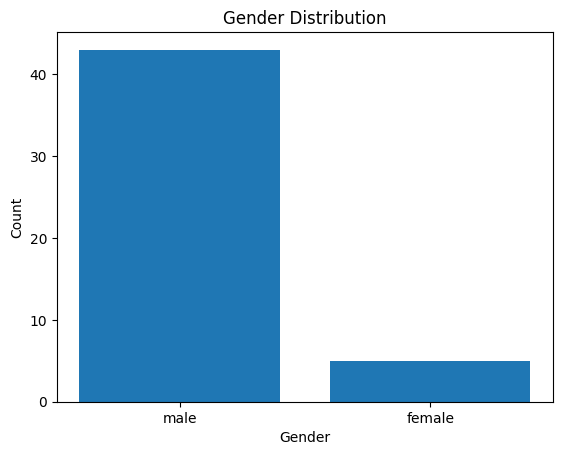

In [4]:
# TODO: Analyze gender distribution
gender_counts = data['gender'].value_counts()
plt.bar(gender_counts.index, gender_counts.values)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show


In [5]:
from sklearn.utils import resample

# TODO: Encode categorical variables
data['gender'] = data['gender'].map({'male':1,'female':0})


# TODO: Separate majority and minority classes
df_majority = data[data.gender==1]  # Assuming 'male' is encoded as 1
df_minority = data[data.gender==0] # Assuming 'female' is encoded as 0

# Upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),    # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Display new class counts
print(df_upsampled.gender.value_counts())

gender
1    43
0    43
Name: count, dtype: int64


### TODO - Train your model on the balanced dataset

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import pandas as pd

# Create Labels for the dataset
X_raw = df_upsampled.drop('gender',axis=1)
y = df_upsampled['gender']

# Apply one-hot encoding to categorical features in X_raw
X = pd.get_dummies(X_raw, columns=['race', 'education'], drop_first=True)

# Split the dataset into train and testing
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=50)

#Train the model
model = LogisticRegression(solver='liblinear') # Added solver for robustness
model.fit(X_train,y_train)

# Test the model
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        11

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18

